# Homework 4

## Question 1

### 1. A naive analysis

We import the data stored in the csv file and we perform a first naive analysis.

We are interested in the *re78* value and how it differs between people who have followed the training program (*treat=1*) and those who did not (*treat=0*).

The first idea is to split the data according to the value of *treat* using the **groupby** method, and use **describe** to print the basic stats about *re78* for each group.

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [28]:
db = pd.read_csv('lalonde.csv')


db.head()

,id,treat,age,educ,black,hispan,married,nodegree,re74,re75,re78
0,NSW1,1,37,11,1,0,1,1,0.0,0.0,9930.0460
1,NSW2,1,22,9,0,1,0,1,0.0,0.0,3595.8940
2,NSW3,1,30,12,1,0,0,0,0.0,0.0,24909.4500
3,NSW4,1,27,11,1,0,0,1,0.0,0.0,7506.1460
4,NSW5,1,33,8,1,0,0,1,0.0,0.0,289.7899


In [29]:
db.groupby(['treat'])['re78'].describe()

,count,mean,std,min,25%,50%,75%,max
treat,,,,,,,,
0,429.0,6984.169742,7294.161791,0.0,220.1813,4975.505,11688.820,25564.67
1,185.0,6349.143530,7867.402218,0.0,485.2298,4232.309,9642.999,60307.93


We observe that participating in the program does not seem to improve your income, as the *mean* income is greater among people who did not follow the program.

However the *1st quartile (25%)* is higher among people who followed the program, meaning that there are fewer people with very low salaries.

Moreover, the *max* and *standard deviation* are higher, which means that there are few people who followed the program and earned a lot more than people not following the program, as shown in the following graph:

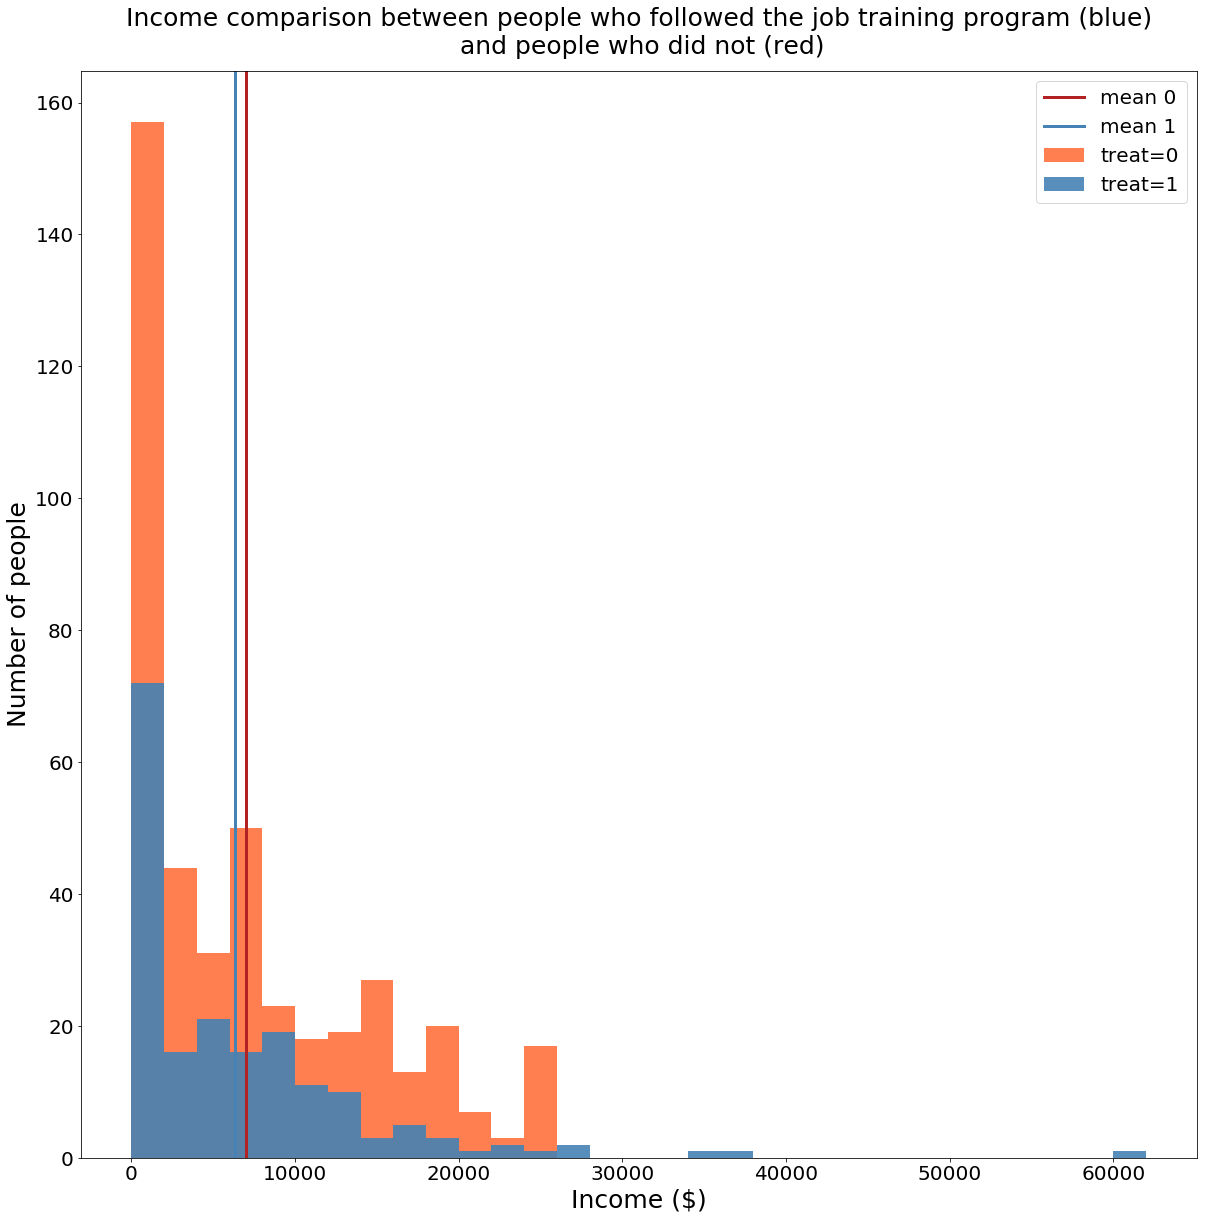

In [30]:
# Regularized bin size according to the values obtained with describe
bins_ = pd.Series([2000*i for i in range(32)])

# Large figure
fig = plt.figure(figsize=(20,20))

# Bin plots: note that they are NOT stacked
ax0 = db[db['treat']==0]['re78'].plot.hist(bins=bins_, color='coral', alpha=1, label='treat=0')
ax1 = db[db['treat']==1]['re78'].plot.hist(bins=bins_, color='steelblue', alpha=0.9,  label='treat=1')

# Add the means of each group
plt.axvline(db[db['treat']==0]['re78'].mean(),color='firebrick',lw=3,label ='mean 0')
plt.axvline(db[db['treat']==1]['re78'].mean(),color='steelblue',lw=3,label ='mean 1')

# Adapt the legend/axis/title size
plt.legend(prop={'size': 20})
plt.tick_params(labelsize=20)
plt.title('Income comparison between people who followed the job training program (blue)\n and people who did not (red)',fontsize=25,y=1.01)
plt.xlabel('Income ($)',fontsize=25)
plt.ylabel('Number of people',fontsize=25)
plt.show()

A naive researcher might conclude that, despite a few particular cases of great success, the program is **not efficient** to train people.

### 2. A closer look at the data

We are now looking more in detail into the data. We start by comparing the *population distribution* between the trained group and the other group.
To do so we add a new column *other* so that every person is either *black*, *hispanic* or *other*.
To display the results we use a **bar** plot.

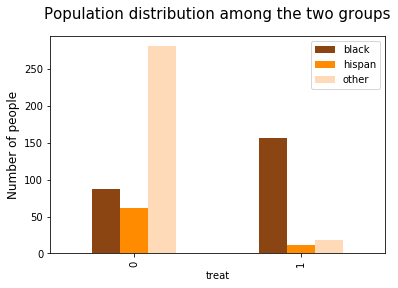

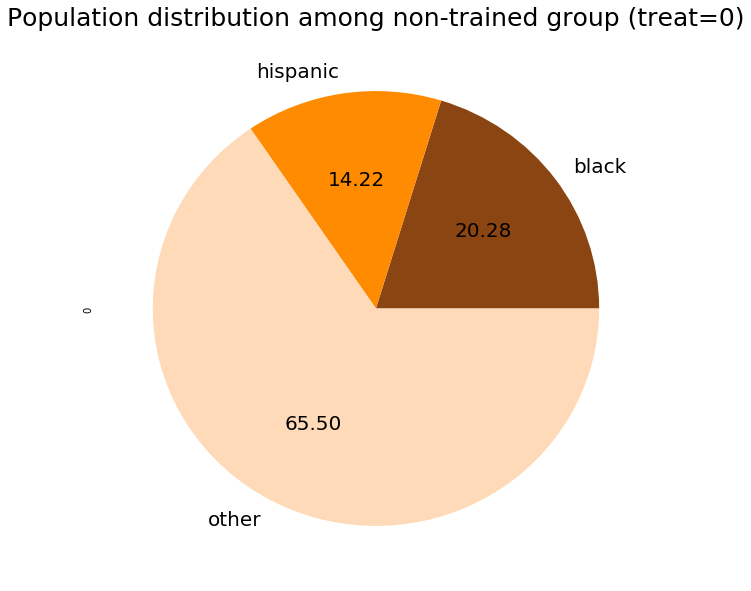

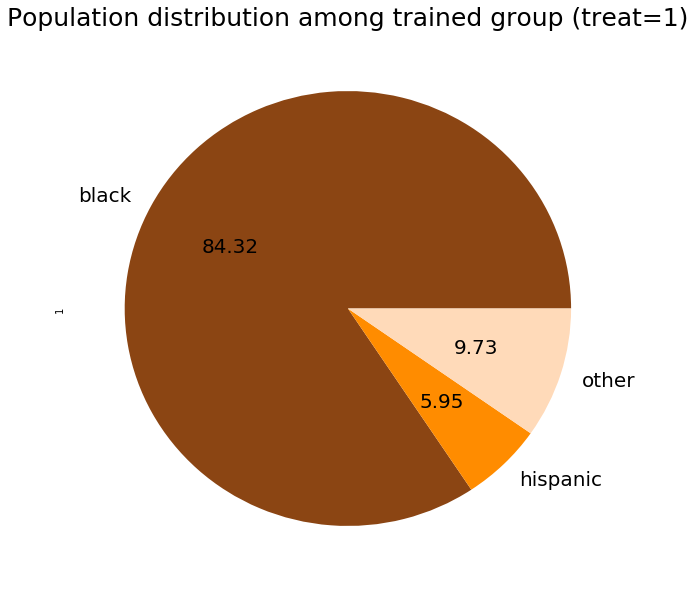

In [31]:
db['other'] = 1-db['black']-db['hispan']
db_pop_distrib = db.groupby(db['treat'])[['black','hispan','other']].sum()

ax = db_pop_distrib.plot.bar(color=['saddlebrown','darkorange','peachpuff'])
plt.title('Population distribution among the two groups',fontsize=15,y=1.05)
plt.ylabel('Number of people',fontsize=12)
plt.show()

db_pop_distrib.iloc[0].plot.pie(labels=['black','hispanic','other'], colors=['saddlebrown','darkorange','peachpuff'],autopct='%.2f', fontsize=20, figsize=(10, 10))
plt.title('Population distribution among non-trained group (treat=0)',fontsize=25,y=1.01)
plt.show()

db_pop_distrib.iloc[1].plot.pie(labels=['black','hispanic','other'], colors=['saddlebrown','darkorange','peachpuff'],autopct='%.2f', fontsize=20, figsize=(10, 10))
plt.title('Population distribution among trained group (treat=1)',fontsize=25,y=1.01)
plt.show()

It appears that the population subject to the test is inherently **different** from the non-trained sample. Mostly black people took part to the training, which means blindly comparing the data from *treat=1* and *treat=0* does not make any sense.

Let us recall that in 1963, the Civil Rights Movement were marching on Washington to denounce the racial violence and discrimination in the USA. Merely 15 years after the passage of the Civil Rights Act, there must remain **income discrepancies** between black people and white people, due to American History.



We now take a look at the age distribution between the two groups: 

In [32]:
db.groupby(['treat'])['age'].describe()

,count,mean,std,min,25%,50%,75%,max
treat,,,,,,,,
0,429.0,28.030303,10.786653,16.0,19.0,25.0,35.0,55.0
1,185.0,25.816216,7.155019,17.0,20.0,25.0,29.0,48.0


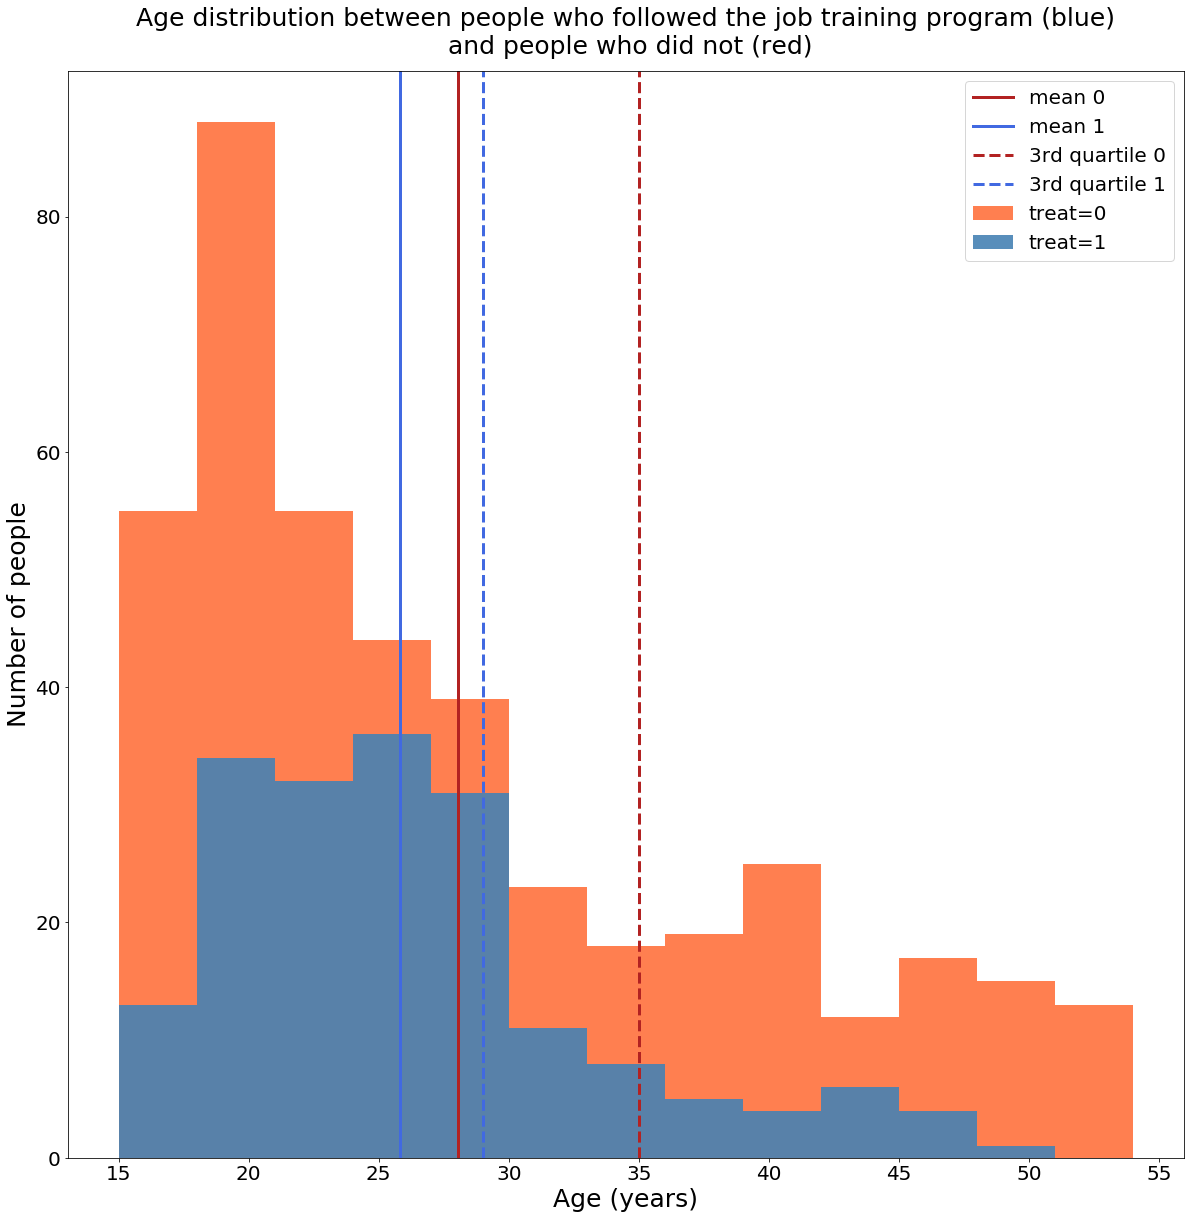

In [33]:
# Regularized bin size according to the values obtained with describe
bins_ = pd.Series([3*i for i in range(5,19)])

# Large figure
fig = plt.figure(figsize=(20,20))

# Bin plots: note that they are NOT stacked
ax0 = db[db['treat']==0]['age'].plot.hist(bins=bins_, color='coral', alpha=1, label='treat=0')
ax1 = db[db['treat']==1]['age'].plot.hist(bins=bins_, color='steelblue', alpha=0.9,  label='treat=1')

# Add the means of each group
plt.axvline(db[db['treat']==0]['age'].mean(),color='firebrick',lw=3,label ='mean 0')
plt.axvline(db[db['treat']==1]['age'].mean(),color='royalblue',lw=3,label ='mean 1')

# Add the 3rd quartile
plt.axvline(db[db['treat']==0]['age'].quantile(.75),color='firebrick',lw=3,label ='3rd quartile 0', linestyle='dashed')
plt.axvline(db[db['treat']==1]['age'].quantile(.75),color='royalblue',lw=3,label ='3rd quartile 1', linestyle='dashed')

# Adapt the legend/axis/title size
plt.legend(prop={'size': 20})
plt.tick_params(labelsize=20)
plt.title('Age distribution between people who followed the job training program (blue)\n and people who did not (red)',fontsize=25,y=1.01)
plt.xlabel('Age (years)',fontsize=25)
plt.ylabel('Number of people',fontsize=25)
plt.show()

We observe two differences: 
* people who followed the training are slightly younger on average,
* there are more *older* people in the non-trained population: 25% of the non-trained are above 35 years old while this bound is at 29 years old among the trained group.

It matters because of **career advancement**, ie the fact that people move up to higher positions during their careers, which implies higher incomes. It is **not relevant** to compare the earnings of a 55 year-old and those of a 20 year-old.

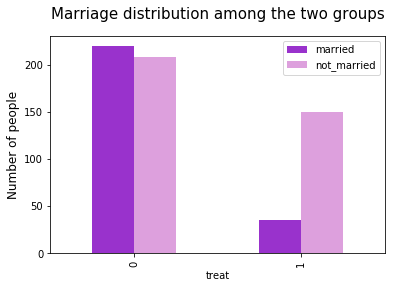

In [34]:
db['not_married'] = 1-db['married']

db_married = db.groupby(db['treat'])[['married','not_married']].sum()

ax = db_married.plot.bar(color=['darkorchid','plum'])
plt.title('Marriage distribution among the two groups',fontsize=15,y=1.05)
plt.ylabel('Number of people',fontsize=12)
plt.show()

Once again there is a **huge difference** of distribution among the married and non-married people in the trained group, whereas it is around 50/50 in the non-trained group. Even if we are not able to identify how it impacts the results, wa can however be convinced that we cannot compare the two groups as if they were equally distributed.

We now look at the education of the two groups:

In [35]:
db.groupby(['treat'])[['educ','nodegree']].describe()

educ                                                  nodegree  \
       count       mean       std  min  25%   50%   75%   max    count   
treat                                                                    
0      429.0  10.235431  2.855238  0.0  9.0  11.0  12.0  18.0    429.0   
1      185.0  10.345946  2.010650  4.0  9.0  11.0  12.0  16.0    185.0   

                                                    
           mean       std  min  25%  50%  75%  max  
treat                                               
0      0.596737  0.491126  0.0  0.0  1.0  1.0  1.0  
1      0.708108  0.455867  0.0  0.0  1.0  1.0  1.0

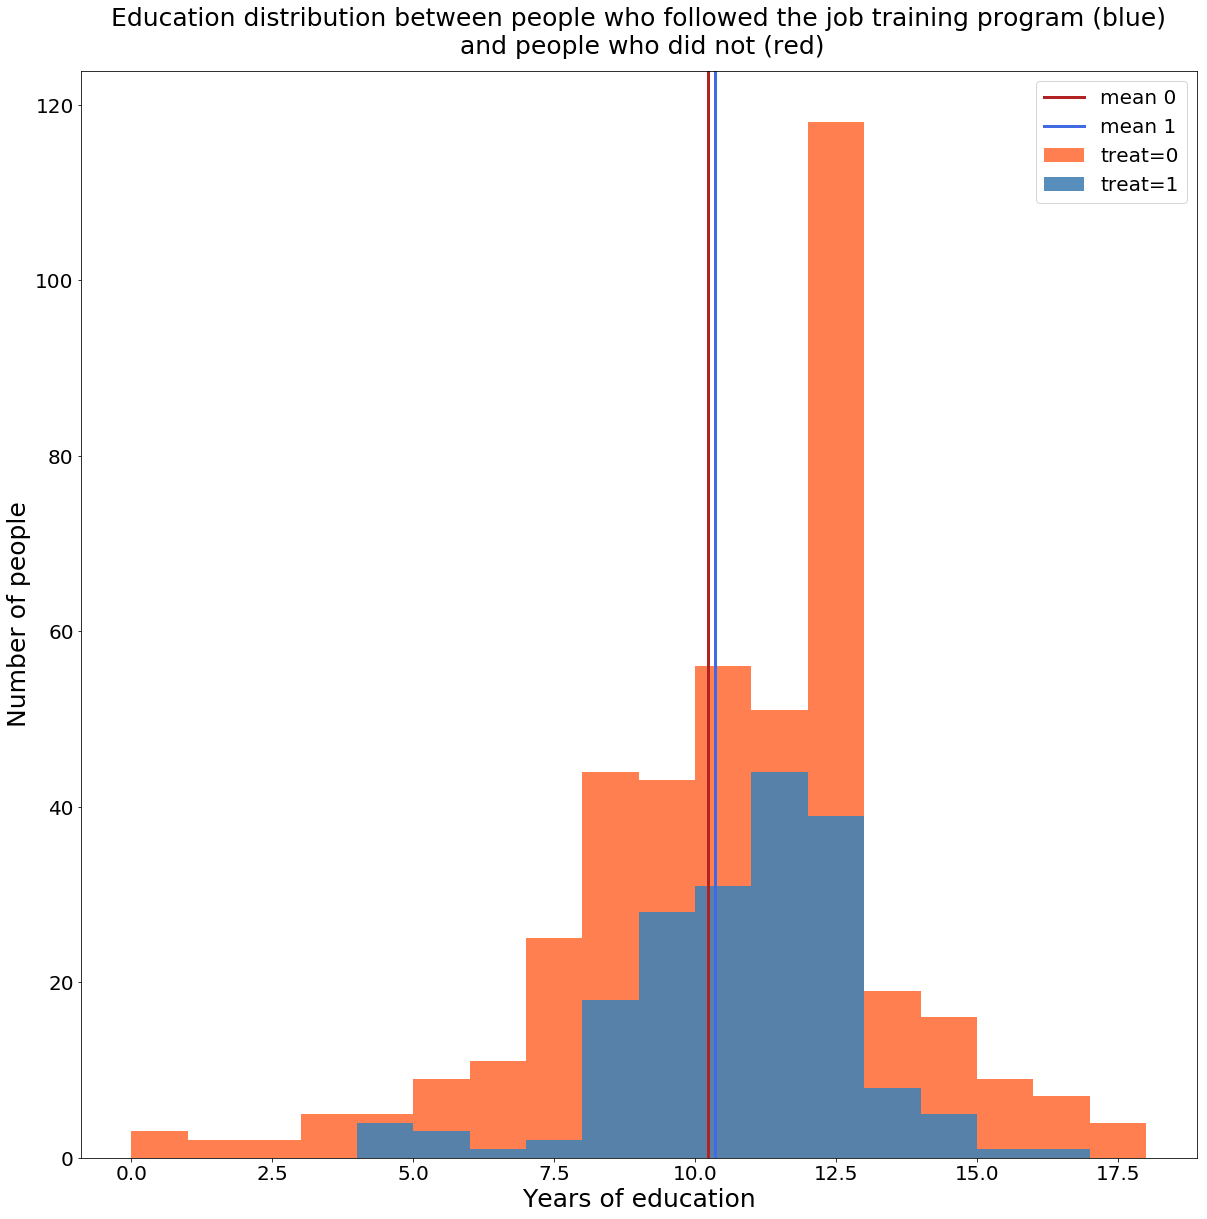

In [36]:
# Regularized bin size according to the values obtained with describe
bins_ = pd.Series([i for i in range(19)])

# Large figure
fig = plt.figure(figsize=(20,20))

# Bin plots: note that they are NOT stacked
ax0 = db[db['treat']==0]['educ'].plot.hist(bins=bins_, color='coral', alpha=1, label='treat=0')
ax1 = db[db['treat']==1]['educ'].plot.hist(bins=bins_, color='steelblue', alpha=0.9,  label='treat=1')

# Add the means of each group
plt.axvline(db[db['treat']==0]['educ'].mean(),color='firebrick',lw=3,label ='mean 0')
plt.axvline(db[db['treat']==1]['educ'].mean(),color='royalblue',lw=3,label ='mean 1')

# Adapt the legend/axis/title size
plt.legend(prop={'size': 20})
plt.tick_params(labelsize=20)
plt.title('Education distribution between people who followed the job training program (blue)\n and people who did not (red)',fontsize=25,y=1.01)
plt.xlabel('Years of education',fontsize=25)
plt.ylabel('Number of people',fontsize=25)
plt.show()

The *education* distribution seems well-balanced between the two groups. The means are very close, the standard deviation is smaller among the trained group (see **describe** above) but the distributions remain consistent between the two groups.

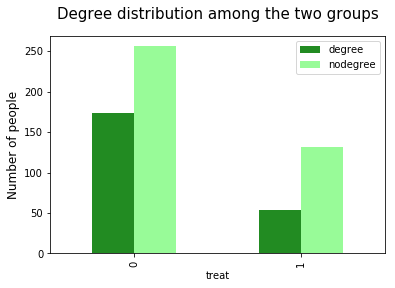

In [37]:
db['degree'] = 1-db['nodegree']

db_degree = db.groupby(db['treat'])[['degree','nodegree']].sum()

ax = db_degree.plot.bar(color=['forestgreen','palegreen'])
plt.title('Degree distribution among the two groups',fontsize=15,y=1.05)
plt.ylabel('Number of people',fontsize=12)
plt.show()

However, the degree distribution is **unbalanced**. Among the trained group, a lot of people do not have a degree, despite the equally distributed years of education.


**Conclusion:** The earnings among the two groups cannot be blindly compared. It appears that the people who followed the training program were not random people among the population, rather a **targeted population** of people who may not be the best suitable for a brilliant career at that time. People with no degree, no stable familial conditions and who were discriminated against in the 70's, followed the program and the results of the training cannot be based on a comparison with a different distribution of population.

### 3. A propensity score model

To obtain the propensity scores of all the entries, we use **sklearn** and its model **logistic regression** as suggested. We compute the estimated model with **fit(X,y)** where *X* is the data (*age, educ, ..., re78*) and *y* is the score (*treat*). We then use **predict_proba** to get the propensity score of each variable.

Note that **predict_proba** returns the *1-p* and *p* for each entry, so we take only the second column.

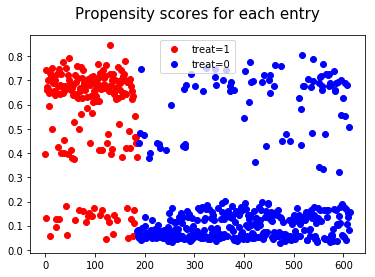

In [38]:
from sklearn import linear_model

logistic = linear_model.LogisticRegression()

db_X = db[['age','educ','black','hispan','married','nodegree','re78']]
db_y = db['treat']

logistic = logistic.fit(db_X, db_y)

prop_score = logistic.predict_proba(db_X)[:,1]

# Plot the propensity scores
X = [i for i in range(len(prop_score))]
# The first 185 entries are treat=1, the rest is treat=0
plt.plot(X[:185],prop_score[:185],'ro',label='treat=1')
plt.plot(X[185:],prop_score[185:],'bo',label='treat=0')
plt.legend()
plt.title('Propensity scores for each entry',fontsize=15,y=1.05)
plt.show()

### 4. Balancing the dataset via matching

We want to find the best possible total matching between *treat=1* and *treat=0*. As suggested we use the module **networkx** to create a graph and use the already implemented matching function **max_weight_matching**.

We create a bipartite graph between *treat=1* and *treat=0* using as weights *1-* the absolute difference between their propensity scores.

In [39]:
import networkx as nx

def create_graph(a,b):
    """creates a bipartite graph between 0,|a|-1 and |a|,|a|+|b|-1 with weights
    a(i)-b(j)"""
    G = nx.Graph()
    for i in range(len(a)):
        for j in range(len(b)):
            G.add_edge(i,len(a)+j,weight=1-abs(a[i]-b[j]))
    return G

G=create_graph(prop_score[:185],prop_score[185:])
matching=nx.max_weight_matching(G)

We just print the differences to see if the matching seems correct:

In [40]:
sum_matching = 0
for key in matching :
    diff = abs(prop_score[key]-prop_score[matching[key]])
    sum_matching += diff

print("The sum of absolute propensity-score differences between the two matched is:",sum_matching/2)
print("The mean absolute propensity-score difference is:",sum_matching/len(matching))

The sum of absolute propensity-score differences between the two matched is: 34.9651707682
The mean absolute propensity-score difference is: 0.189000923071


In [41]:
l = list(matching.values())
match_db = db.loc[l]

match_db.groupby(['treat'])['re78'].describe()

,count,mean,std,min,25%,50%,75%,max
treat,,,,,,,,
0,185.0,6081.483794,6270.117709,0.0,187.6713,4787.834,9206.237,25564.67
1,185.0,6349.143530,7867.402218,0.0,485.2298,4232.309,9642.999,60307.93


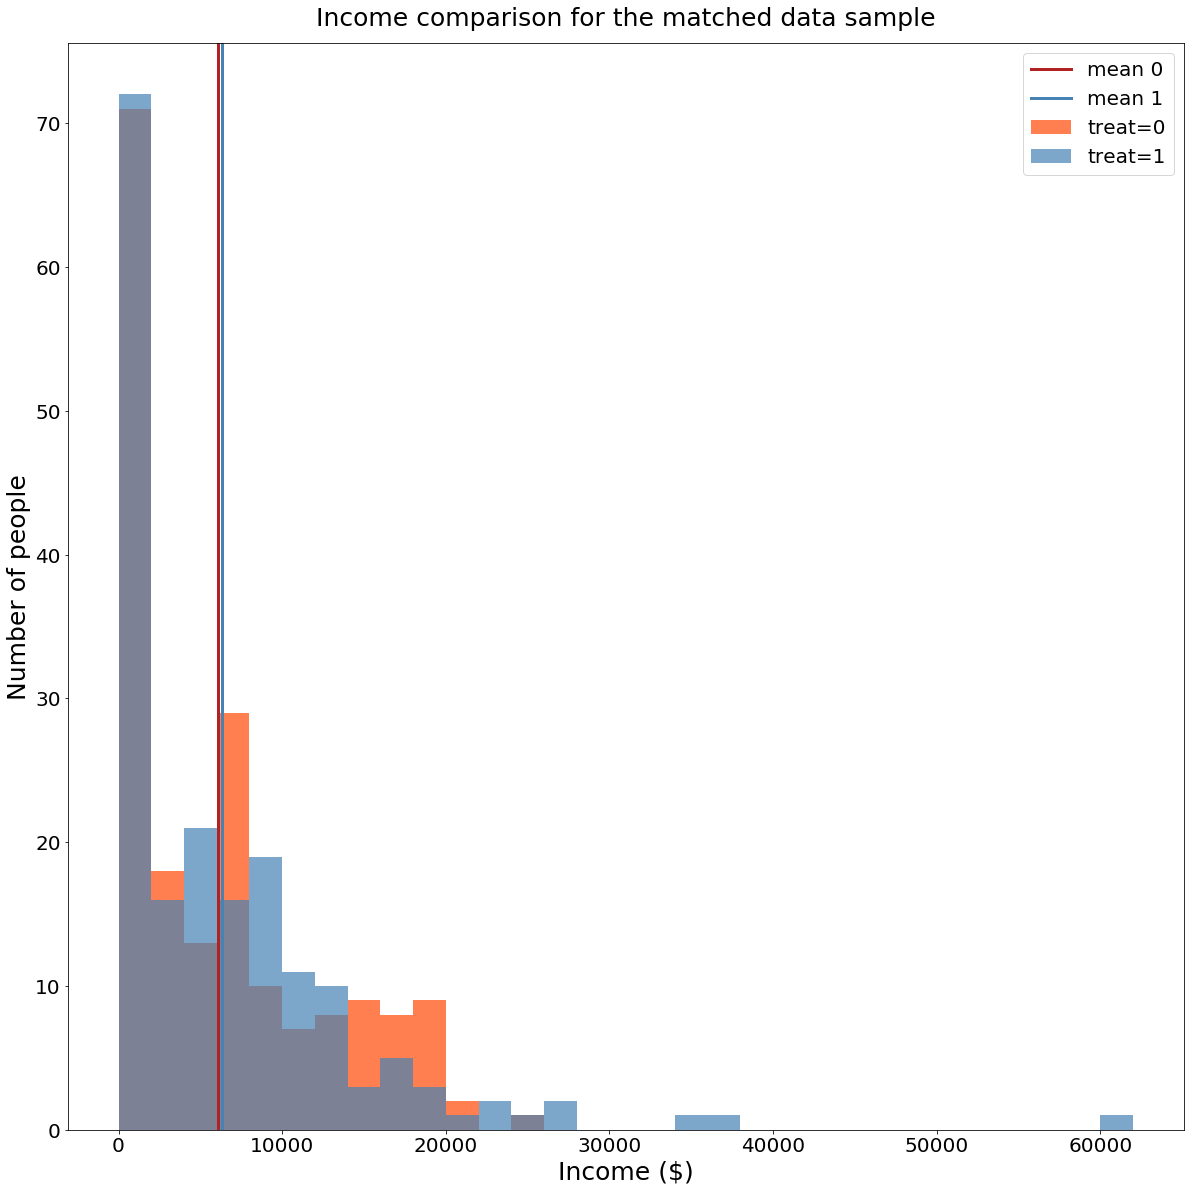

In [42]:
# Regularized bin size according to the values obtained with describe
bins_ = pd.Series([2000*i for i in range(32)])

# Large figure
fig = plt.figure(figsize=(20,20))

# Bin plots: note that they are NOT stacked
ax0 = match_db[match_db['treat']==0]['re78'].plot.hist(bins=bins_, color='coral', alpha=1, label='treat=0')
ax1 = match_db[match_db['treat']==1]['re78'].plot.hist(bins=bins_, color='steelblue', alpha=0.7,  label='treat=1')

# Add the means of each group
plt.axvline(match_db[match_db['treat']==0]['re78'].mean(),color='firebrick',lw=3,label ='mean 0')
plt.axvline(match_db[match_db['treat']==1]['re78'].mean(),color='steelblue',lw=3,label ='mean 1')

# Adapt the legend/axis/title size
plt.legend(prop={'size': 20})
plt.tick_params(labelsize=20)
plt.title('Income comparison for the matched data sample',fontsize=25,y=1.01)
plt.xlabel('Income ($)',fontsize=25)
plt.ylabel('Number of people',fontsize=25)
plt.show()

We see that the earnings distribution is quite different, the job training seems to have been more advantageous than with the naive analysis.

The following codeblock is just all the previous plots, but for the matched sample. It is exactly the same code, but with different results.

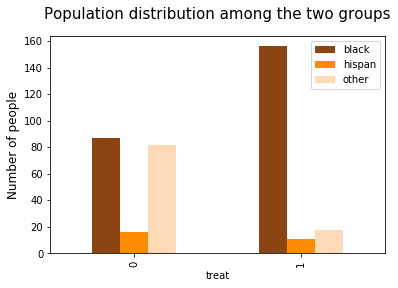

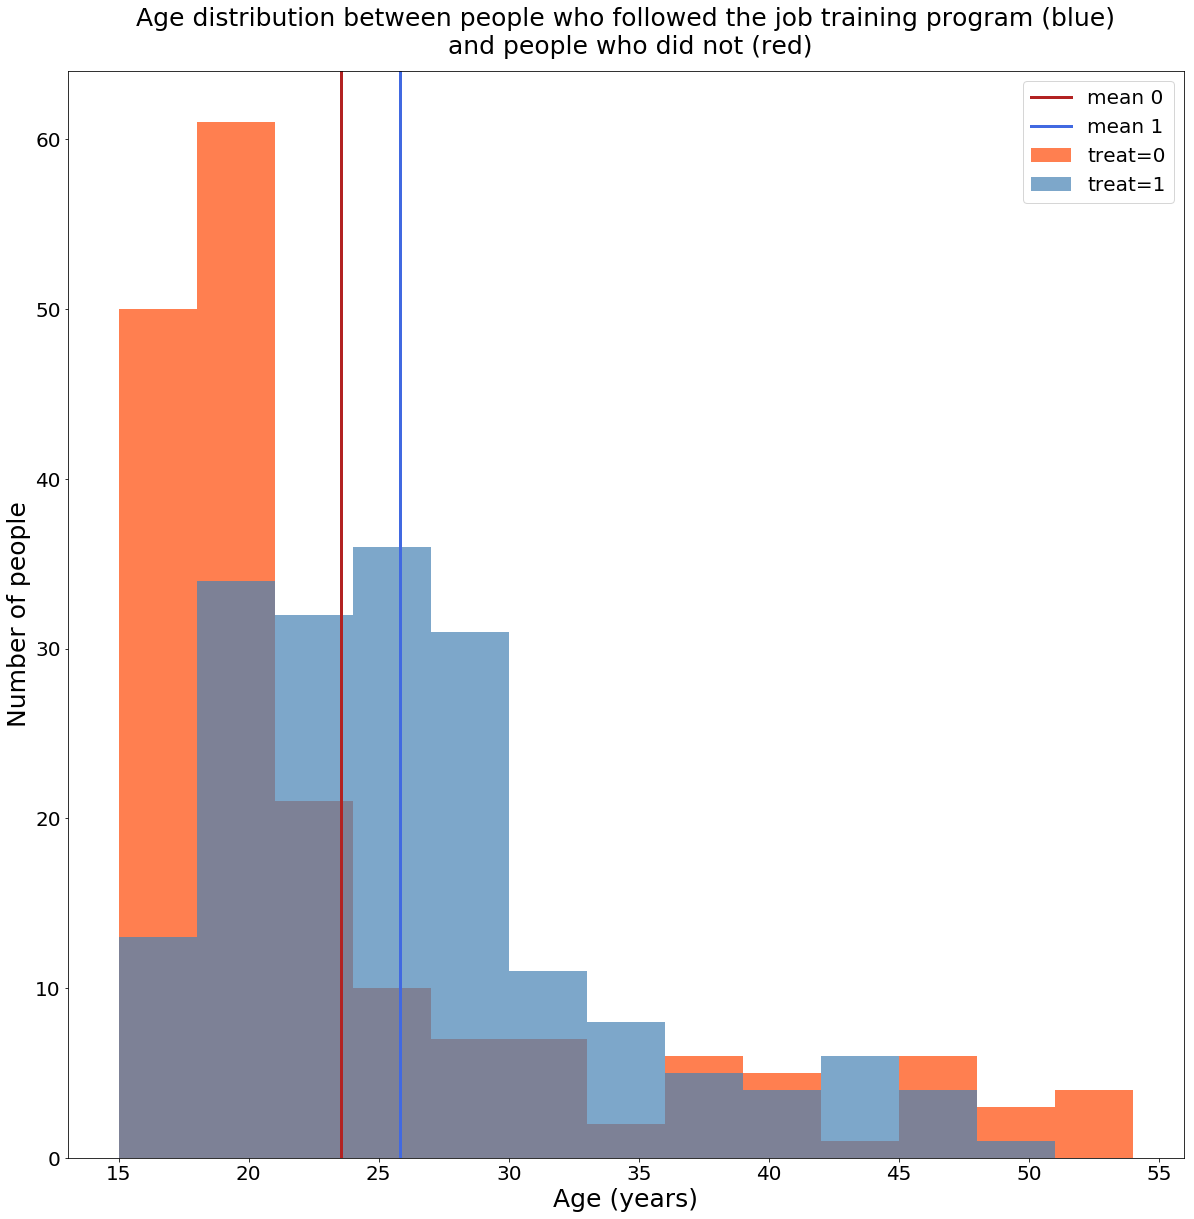

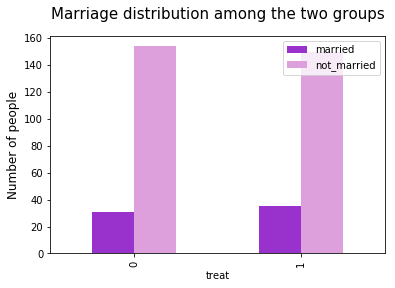

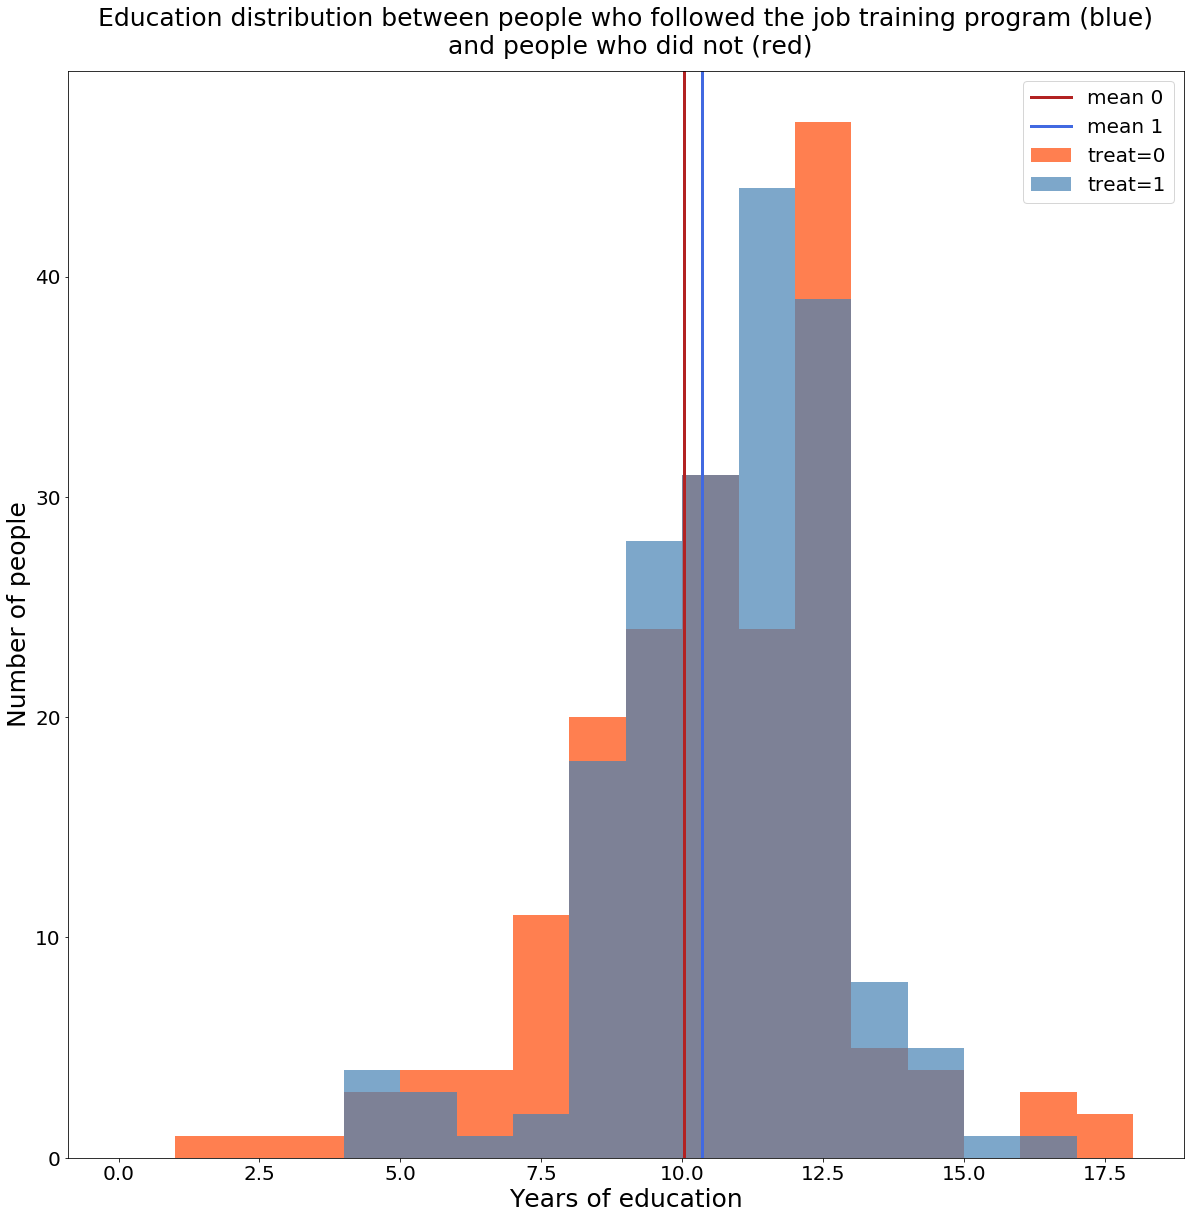

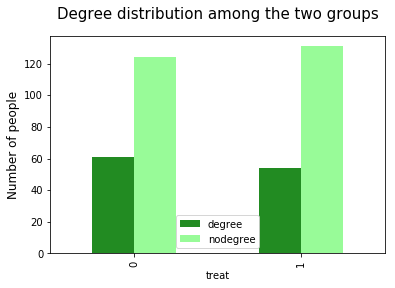

In [43]:
db_pop_distrib = match_db.groupby(match_db['treat'])[['black','hispan','other']].sum()

ax = db_pop_distrib.plot.bar(color=['saddlebrown','darkorange','peachpuff'])
plt.title('Population distribution among the two groups',fontsize=15,y=1.05)
plt.ylabel('Number of people',fontsize=12)
plt.show()

# Regularized bin size according to the values obtained with describe
bins_ = pd.Series([3*i for i in range(5,19)])

# Large figure
fig = plt.figure(figsize=(20,20))

# Bin plots: note that they are NOT stacked
ax0 = match_db[match_db['treat']==0]['age'].plot.hist(bins=bins_, color='coral', alpha=1, label='treat=0')
ax1 = match_db[match_db['treat']==1]['age'].plot.hist(bins=bins_, color='steelblue', alpha=0.7,  label='treat=1')

# Add the means of each group
plt.axvline(match_db[match_db['treat']==0]['age'].mean(),color='firebrick',lw=3,label ='mean 0')
plt.axvline(match_db[match_db['treat']==1]['age'].mean(),color='royalblue',lw=3,label ='mean 1')

# Adapt the legend/axis/title size
plt.legend(prop={'size': 20})
plt.tick_params(labelsize=20)
plt.title('Age distribution between people who followed the job training program (blue)\n and people who did not (red)',fontsize=25,y=1.01)
plt.xlabel('Age (years)',fontsize=25)
plt.ylabel('Number of people',fontsize=25)
plt.show()

db_married = match_db.groupby(match_db['treat'])[['married','not_married']].sum()

ax = db_married.plot.bar(color=['darkorchid','plum'])
plt.title('Marriage distribution among the two groups',fontsize=15,y=1.05)
plt.ylabel('Number of people',fontsize=12)
plt.show()

# Regularized bin size according to the values obtained with describe
bins_ = pd.Series([i for i in range(19)])

# Large figure
fig = plt.figure(figsize=(20,20))

# Bin plots: note that they are NOT stacked
ax0 = match_db[match_db['treat']==0]['educ'].plot.hist(bins=bins_, color='coral', alpha=1, label='treat=0')
ax1 = match_db[match_db['treat']==1]['educ'].plot.hist(bins=bins_, color='steelblue', alpha=0.7,  label='treat=1')

# Add the means of each group
plt.axvline(match_db[match_db['treat']==0]['educ'].mean(),color='firebrick',lw=3,label ='mean 0')
plt.axvline(match_db[match_db['treat']==1]['educ'].mean(),color='royalblue',lw=3,label ='mean 1')

# Adapt the legend/axis/title size
plt.legend(prop={'size': 20})
plt.tick_params(labelsize=20)
plt.title('Education distribution between people who followed the job training program (blue)\n and people who did not (red)',fontsize=25,y=1.01)
plt.xlabel('Years of education',fontsize=25)
plt.ylabel('Number of people',fontsize=25)
plt.show()

db_degree = match_db.groupby(match_db['treat'])[['degree','nodegree']].sum()

ax = db_degree.plot.bar(color=['forestgreen','palegreen'])
plt.title('Degree distribution among the two groups',fontsize=15,y=1.05)
plt.ylabel('Number of people',fontsize=12)
plt.show()

We note that the distributions are much closer, which indicates that the conclusions on the training job are more relevant.

### 5. Balancing the groups further

We could not balance according to ethnic origins as the discrepencies are too wide between treated and untreated people. Moreover, this factor seems to be linked to the outcome.
Because of that, we will force the matching of people of same ethnicity.

In [44]:
import networkx as nx

def create_graph(a,b):
    """creates a bipartite graph between 0,|a|-1 and |a|,|a|+|b|-1 with weights
    a(i)-b(j)"""
    G = nx.Graph()
    for i in range(len(a)):
        for j in range(len(b)):
            if db.loc[i]['black'] == db.loc[j+len(a)]['black'] and db.loc[i]['hispan'] == db.loc[j+len(a)]['hispan']:
                G.add_edge(i,len(a)+j,weight=1-abs(a[i]-b[j]))
    return G

G=create_graph(prop_score[:185],prop_score[185:])
matching=nx.max_weight_matching(G)

We just print the differences to see if the matching seems correct:

In [45]:
sum_matching = 0

for key in matching :
    diff = abs(prop_score[key]-prop_score[matching[key]])
    sum_matching += diff

print("The sum of absolute propensity-score differences between the two matched is:",sum_matching/2)
print("The mean absolute propensity-score difference is:",sum_matching/len(matching))

The sum of absolute propensity-score differences between the two matched is: 0.456943657161
The mean absolute propensity-score difference is: 0.00393916945828


### 6. A less naive analysis

We will now do exactly the same analysis as above, but with the new matching.

In [46]:
l = list(matching.values())
match_db = db.loc[l]

match_db.groupby(['treat'])['re78'].describe()

,count,mean,std,min,25%,50%,75%,max
treat,,,,,,,,
0,116.0,5041.162295,6098.761226,0.0,0.0000,2283.0875,7866.30825,20243.38
1,116.0,7134.596113,7378.247237,0.0,1203.0445,5297.3505,10270.70250,36646.95


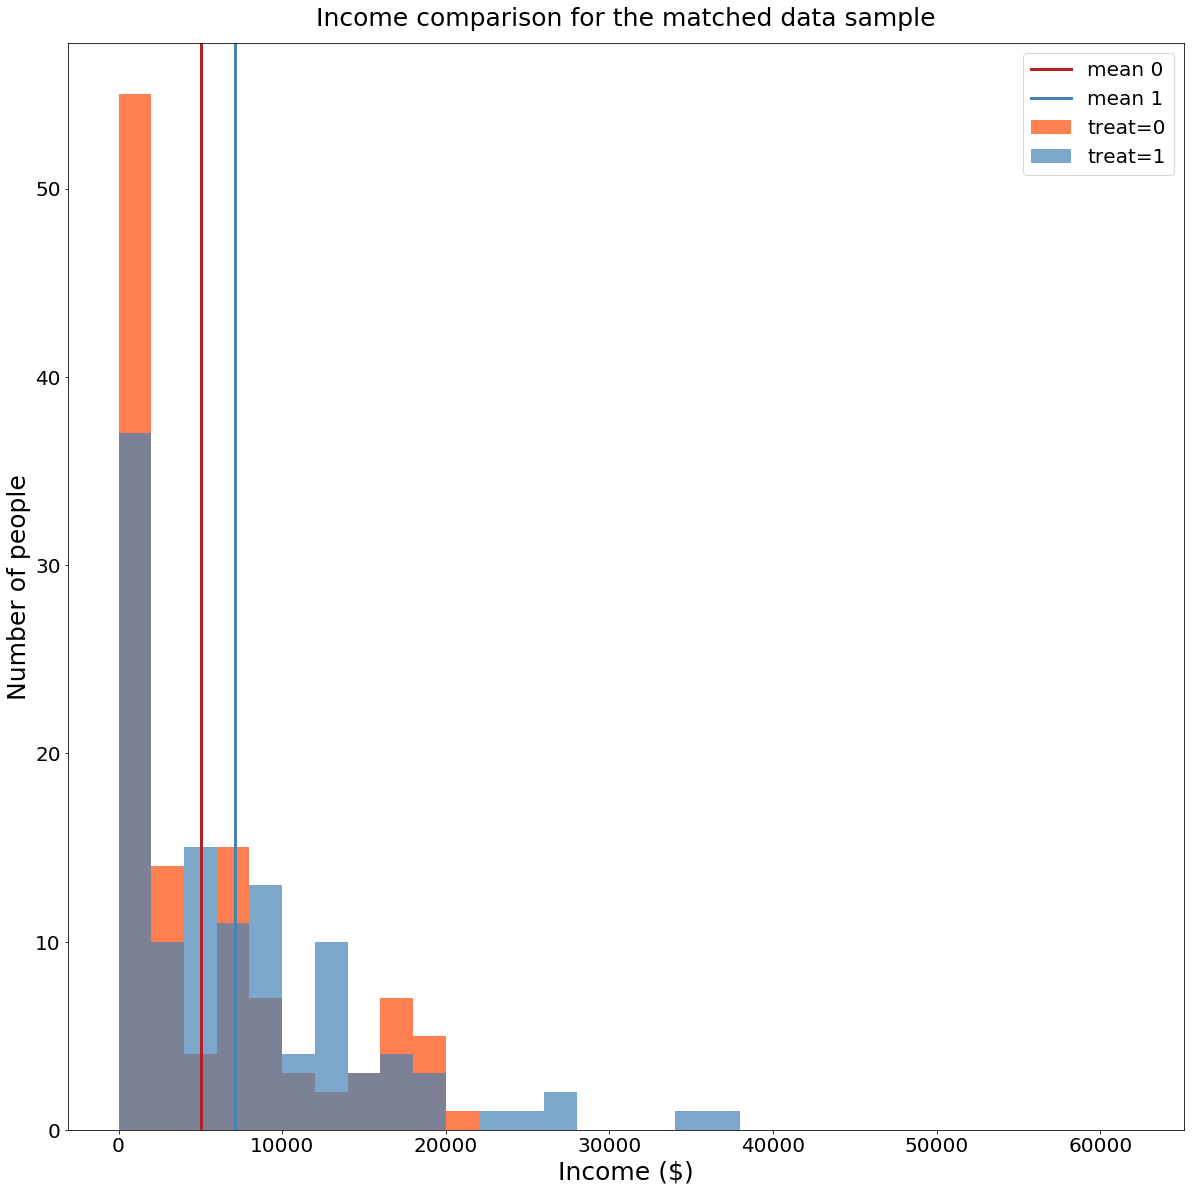

In [47]:
# Regularized bin size according to the values obtained with describe
bins_ = pd.Series([2000*i for i in range(32)])

# Large figure
fig = plt.figure(figsize=(20,20))

# Bin plots: note that they are NOT stacked
ax0 = match_db[match_db['treat']==0]['re78'].plot.hist(bins=bins_, color='coral', alpha=1, label='treat=0')
ax1 = match_db[match_db['treat']==1]['re78'].plot.hist(bins=bins_, color='steelblue', alpha=0.7,  label='treat=1')

# Add the means of each group
plt.axvline(match_db[match_db['treat']==0]['re78'].mean(),color='firebrick',lw=3,label ='mean 0')
plt.axvline(match_db[match_db['treat']==1]['re78'].mean(),color='steelblue',lw=3,label ='mean 1')

# Adapt the legend/axis/title size
plt.legend(prop={'size': 20})
plt.tick_params(labelsize=20)
plt.title('Income comparison for the matched data sample',fontsize=25,y=1.01)
plt.xlabel('Income ($)',fontsize=25)
plt.ylabel('Number of people',fontsize=25)
plt.show()

We see that the earnings distribution is even more striking, the job training seems to have been more advantageous than with the previous analysis.

## Question 2

### 1/ Creating features and splitting data

In [1]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

import numpy as np



In [2]:
#All categories (change it to extract only some categories)
categories = ['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 
              'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey', 
              'sci.crypt', 'sci.electronics', 'sci.med', 'sci.space', 'soc.religion.christian', 'talk.politics.guns', 
              'talk.politics.mideast', 'talk.politics.misc', 'talk.religion.misc']

#Extraction of the data
newsgroups_train = fetch_20newsgroups(data_home='.', subset='train', categories=categories, download_if_missing=False)


newsgroups_train.keys()

dict_keys(['data', 'filenames', 'target_names', 'target', 'DESCR', 'description'])

In [3]:
#Computing TF-IDF
vectorizer = TfidfVectorizer()
vectors = vectorizer.fit_transform(newsgroups_train.data)
vectors.shape

(11314, 130107)

In [4]:
#Generating training, testing and validation set using seeded random
seed = 42
np.random.seed(seed)

size = vectors.shape[0]
t = np.arange(size)
np.random.shuffle(t)

#80% training
train_data = vectors[t[:int(size*.8)]]
train_target = newsgroups_train.target[t[:int(size*.8)]]

#10% testing
test_data = vectors[t[int(size*.8):int(size*.9)]]
test_target = newsgroups_train.target[t[int(size*.8):int(size*.9)]]

#10% validation
valid_data = vectors[t[int(size*.9):]]
valid_target = newsgroups_train.target[t[int(size*.9):]]

### 2/ Actual training and conclusion

Justification of grid search

In [6]:
#List of (accuracy,parameters,classifier) 
liste = []

for i in [4**i for i in range(1,6)]:
    for j in range(2,40,4):
        
        clf = RandomForestClassifier(n_estimators=i,max_depth=j)
        clf = clf.fit(train_data,train_target)
    
        #Correct answer over the number of test cases
        proba = sum(clf.predict(valid_data) == valid_target)/valid_target.shape[0]
        
        liste.append((proba,(i,j),clf))


#Taking optimal classifier
liste.sort()
clf = liste[-1][-1]

print("Accuracy:",liste[-1][0]," Numbers of estimators:",liste[-1][1][0]," Max depth:",liste[-1][1][1])

Accuracy: 0.838339222615  Numbers of estimators: 1024  Max depth: 38


In [7]:
#Output on testing set
pred = clf.predict(test_data)

#Confusion matrix
confusion = confusion_matrix(test_target,pred)

confusion

array([[30,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  7,  1,
         0,  0,  1],
       [ 0, 39,  7,  6,  1,  3,  2,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,
         0,  0,  0],
       [ 0,  2, 62,  1,  0,  1,  3,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0],
       [ 0,  2,  4, 45,  1,  0,  1,  1,  0,  0,  0,  1,  3,  0,  1,  0,  0,
         0,  0,  0],
       [ 0,  0,  1,  2, 48,  0,  2,  0,  0,  1,  0,  0,  1,  0,  0,  0,  1,
         0,  0,  0],
       [ 0,  5,  3,  1,  0, 58,  0,  1,  0,  0,  0,  0,  0,  1,  1,  1,  0,
         0,  0,  0],
       [ 0,  0,  1,  1,  0,  0, 63,  1,  0,  0,  1,  0,  1,  0,  0,  0,  0,
         0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 44,  1,  0,  0,  0,  2,  0,  2,  0,  0,
         0,  0,  0],
       [ 0,  1,  0,  0,  0,  0,  2,  2, 39,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0],
       [ 0,  1,  0,  0,  0,  0,  1,  0,  0, 60,  4,  0,  0,  1,  0,  0,  0,
         0,  0,  0],
       [ 0,  0,  0,  0,  0,  0

In [10]:
#Analyzing important features

x = [np.where(clf.feature_importances_ == i) for i in sorted(clf.feature_importances_,reverse = True)[:20]]
features = np.concatenate([i[0] for i in x])
feature_names = [vectorizer.get_feature_names()[i] for i in features]
print(feature_names)
print(newsgroups_train.target_names)

['dod', 'sale', 'bike', 'windows', 'clipper', 'car', 'encryption', 'hockey', 'god', 'gun', 'israel', 'space', 'rutgers', 'key', 'nhl', 'team', 'israeli', 'cars', 'baseball', 'orbit']
['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt', 'sci.electronics', 'sci.med', 'sci.space', 'soc.religion.christian', 'talk.politics.guns', 'talk.politics.mideast', 'talk.politics.misc', 'talk.religion.misc']
